# 군집화

### K-means

- 군집화에서 가장 일반적으로 사용되는 알고리즘
- **군집 중심점(centroid)**
    
    **centroid**라는 **특정한 임의의 지점**을 선택해 **해당 중심에 가장 가까운 포인트**를 선택하는 기법
    
    centroid는 계속해서 선택된 포인트의 평균 지점으로 이동
    
    만약, **중심점의 이동이 없다면 반복을 멈춤** (해당 군집 선택 완료)
    
    이 **프로세스의 반복**을 통해 군집화를 진행
    
- **장점**
    - 일반적인 알고리즘
        
        쉽고 간결
        
- 단점
    - 거리 기반 알고리즘으로 **속성이 많을 경우 정확도 떨어짐** (sparse 해져서?)
    - 반복 수행하는데, **반복 횟수 많을 경우 수행 시간 느려짐**
    - 몇 개의 군집을 선택할 지 가이드하기 어려움
    
- 사이킷런의 KMeans 클래스
    - 중요 파라미터
        - n_clusters
            
            군집화할 개수, 군집 중심점의 개수
            
        - init
            
            초기에 군집 중심점 좌표 설정하는 방식 (주로 “k-means++”)
            
        - max_iter
            
            최대 반복 횟수 → 이 이전에 중심점 이동 없으면 종료
            
    - 중요 속성
        - labels_
            
            각 데이터 포인트가 속한 군집 중심점 레이블
            
        - cluster_centers_
            
            각 군집 중심점 좌표 ([군집 개수, 피처 개수]) 
            
            → 군집 중심점 좌표 시각화 용도

### K-Means를 이용한 붓꽃(Iris) 데이터 셋 Clustering

붓꽃의 꽃받침(sepal)과 꽃잎(petal) 길이로 clustering 진행 후 분류와 비교해 볼 것

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [2]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
# 3개의 군집으로 묶기
# k-means++로 centroid initialize
# 최대 반복 개수는 300개
kmeans.fit(irisDF)

C:\Users\dwchoi0610\Anaconda3\envs\CAU_DSLAB\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

0, 1, 2의 3개의 군집으로 정리됨

In [3]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


irisDF로 정리 후 살펴보면, 0과 1은 clustering 수행 결과가 좋지만, 2는 잘 안됨 (정확도 72% 불과)

In [4]:
irisDF['target'] = iris.target
irisDF['cluster']=kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


시각화를 통해 알아보기 위해, 4개인 속성을 2개로 줄여 (PCA)  
시각화 진행

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


파란색과 초록색의 경계부분에서 겹침이 발생하는 것으로 파악

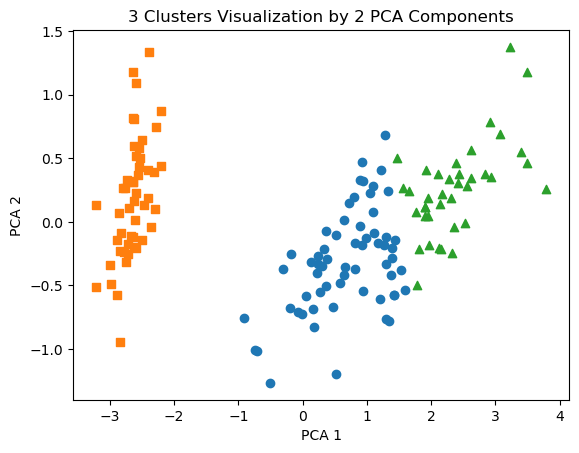

In [6]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

### 군집화 테스트를 위한 데이터 생성

- Scikit-learn에서 군집화 알고리즘을 테스트해보기 위한 **간단한 데이터 생성기 제공**
    - make_blobs( )
        
        개별 군집의 중심점과 표준 편차 제어 기능 추가
        
    - make_classification( )
        
        노이즈를 포함한 데이터 생성에 유용하게 사용
        
    - make_circle( ), make_moon( ) …

**make_blobs( )**

- parameters
    - n_samples
        
        생성할 총 데이터의 개수 (default 100개)
        
    - n_features
        
        데이터의 피처 수 
        
        보통 2개로 설정해 시각화에 사용 (처음이 x, 두번째가 y)
        
    - centers
        
        int값 → 군집의 개수를 나타냄
        
        ndarray → 개별 군집 중심점의 좌표
        
    - cluster_std
        
        생성될 군집 데이터의 표준 편차 의미
        
        ex. [0.8, 1.2, 0.6] → 3개의 군집의 각 표준편차가 0.8, 1.2, 0.6
        
        ⇒ 군집 별로 서로 다른 표준 편차를 가진 데이터셋을 만들 때 사용

### Clustering 알고리즘 테스트를 위한 데이터 생성 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

# make_blobs는 데이터 셋 만드는 api
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [8]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


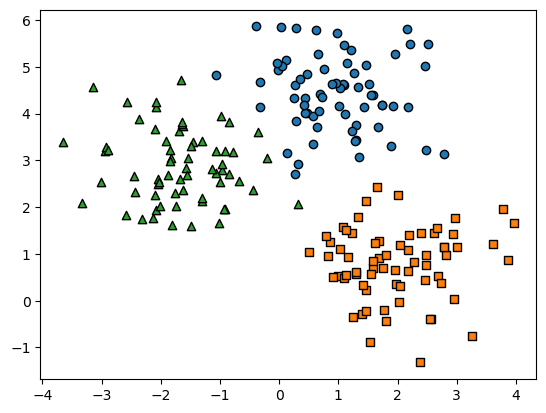

In [9]:
target_list = np.unique(y)
# 각 타깃별 산점도의 마커 값.
markers=['o', 's', '^', 'P', 'D', 'H', 'x']
# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0, 1, 2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성.
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k',
                marker=markers[target] )

plt.show()

C:\Users\dwchoi0610\Anaconda3\envs\CAU_DSLAB\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


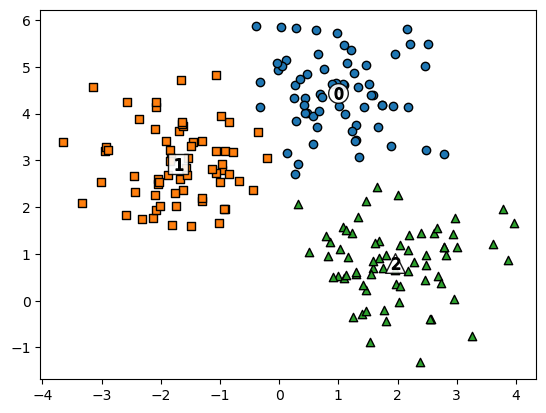

In [10]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
# kmeans label이라는 column을 만들어 clusterDF에 저장해 target과 비교 
clusterDF['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()


In [11]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64
